## OVERVIEW
### Informasi Data
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).
### Tujuan Pemodelan
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

**Sumber data: UCI Learning Machine Repository “Default of credit card clients data set”. Data dimodifikasi untuk keperluan botdcamp.**

In [99]:
#import numpy and pandas
import numpy as np
import pandas as pd

#import visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn
from sklearn import preprocessing
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.cross_validation import KFold

## DATA PREPARATION

### Import Data

In [100]:
#import data
dftest = pd.read_csv('testing.csv',delimiter=';')
dftest = dftest.drop(columns=['ID'], axis=1) 
dftest.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [101]:
dftrain = pd.read_csv('training.csv', delimiter=',')
dftrain = dftrain.drop(columns=['ID'], axis=1) 
dftrain.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [102]:
print(dftest.shape)
print(dftrain.shape)

(16625, 14)
(16625, 15)


In [103]:
print(dftest.info())
print(dftrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 14 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(7)
memory usage: 1.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int

In [104]:
dftest.describe()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,1.476932,2.117534,1.588752,43.373955,0.430256,0.397293,0.336902,48815.920662,46471.030556,42999.439639,4973.786105,4830.003368,4303.243008
std,124931.062684,0.523590,0.791191,0.492075,8.777974,0.881835,0.853110,0.808848,70753.129768,68182.984755,63666.018029,14867.362888,15646.002915,13343.967061
min,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-69777.000000,-61506.000000,-65167.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,2997.000000,2550.000000,2333.000000,451.000000,306.000000,121.000000
50%,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,20987.000000,19954.000000,19162.000000,2000.000000,1637.000000,1361.000000
75%,230000.000000,2.000000,3.000000,2.000000,49.000000,0.000000,0.000000,0.000000,62725.000000,59111.000000,53444.000000,4696.000000,4025.000000,3885.000000
max,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,646770.000000,693131.000000,628699.000000,384986.000000,508229.000000,432130.000000


### Data Cleansing Detection

In [105]:
dftest.isnull().sum().sort_values(ascending=False)

PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
dtype: int64

In [106]:
dftrain.isnull().sum().sort_values(ascending=False)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
dtype: int64

### Numerical and Categorical Type

In [107]:
category_train = ['EDUCATION','MARRIAGE','SEX','PAY_1',
            'PAY_2','PAY_3', 'TARGET']
numerical_train  = dftrain.drop(category_train, axis=1)
categorical_train = dftrain[category_train]
numerical_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0
1,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0
2,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0
3,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0
4,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0


In [108]:
categorical_train.head()

,EDUCATION,MARRIAGE,SEX,PAY_1,PAY_2,PAY_3,TARGET
0,1,1,2,0,0,0,0
1,1,1,2,1,2,0,0
2,1,1,2,0,0,0,0
3,1,1,2,0,0,0,0
4,1,1,2,0,0,0,0


In [109]:
categorical_train = categorical_train.astype(str)
categorical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 7 columns):
EDUCATION    16625 non-null object
MARRIAGE     16625 non-null object
SEX          16625 non-null object
PAY_1        16625 non-null object
PAY_2        16625 non-null object
PAY_3        16625 non-null object
TARGET       16625 non-null object
dtypes: object(7)
memory usage: 909.3+ KB


In [110]:
category_test = ['EDUCATION','MARRIAGE','SEX','PAY_1',
            'PAY_2','PAY_3']
numerical_test  = dftest.drop(category_test, axis=1)
categorical_test = dftest[category_test]
numerical_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,40,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,41,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,36,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,35,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,38,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [111]:
categorical_test.head()

,EDUCATION,MARRIAGE,SEX,PAY_1,PAY_2,PAY_3
0,1,1,2,0,0,0
1,1,1,2,2,0,0
2,1,1,2,0,0,0
3,1,1,2,0,0,0
4,1,1,2,0,0,0


### Outlier Detection

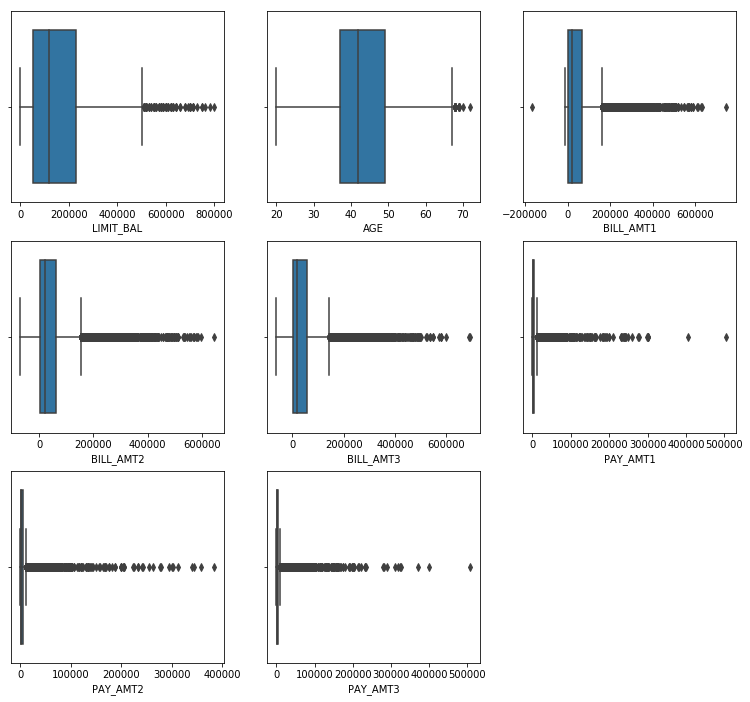

In [112]:
fig=plt.figure(figsize=(13,12))
axes=330
#put data numerical
for num in numerical_train:
    axes += 1
    fig.add_subplot(axes)
    #set title of num
    sns.boxplot(data = numerical_train, x=num) 
plt.show()

### Exploration Data Analysis

#### Correlation Plot (Heat Map)

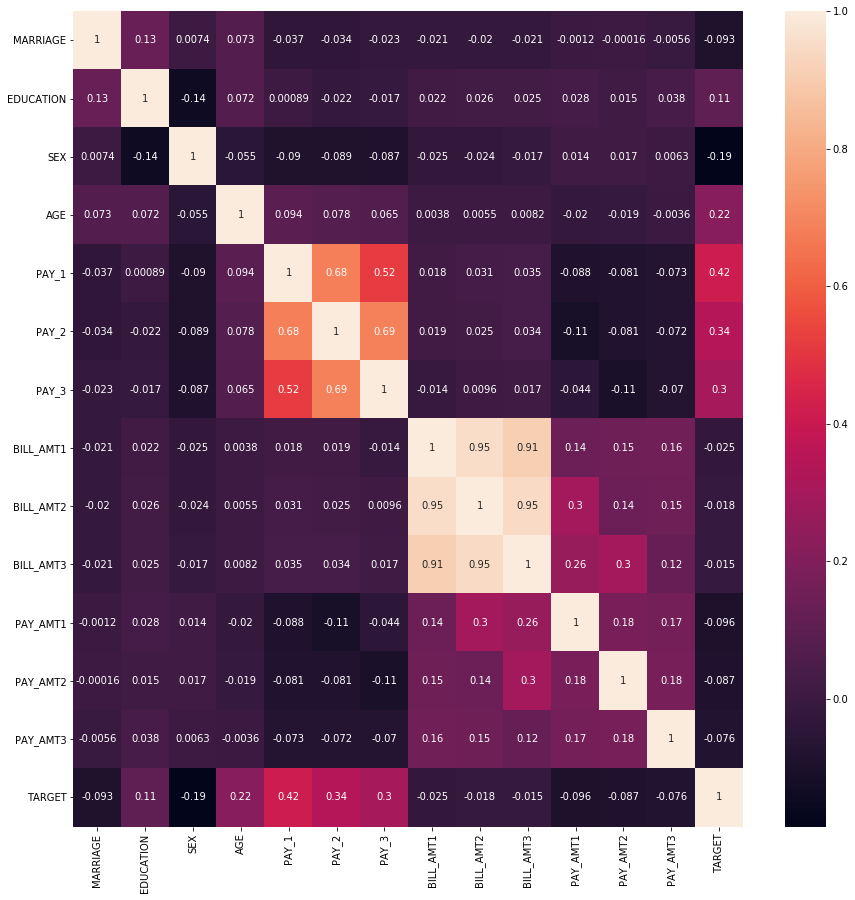

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(dftrain.iloc[:,1:16].corr(),annot=True)

Berdasarkan hasil HeatMap feature yang berpengaruh terhadap keputusan kredit macet atau tidak adalah:
1. EDUCATION
2. AGE
3. PAY_1
4. PAY_2
5. PAY_3

#### Box Plot

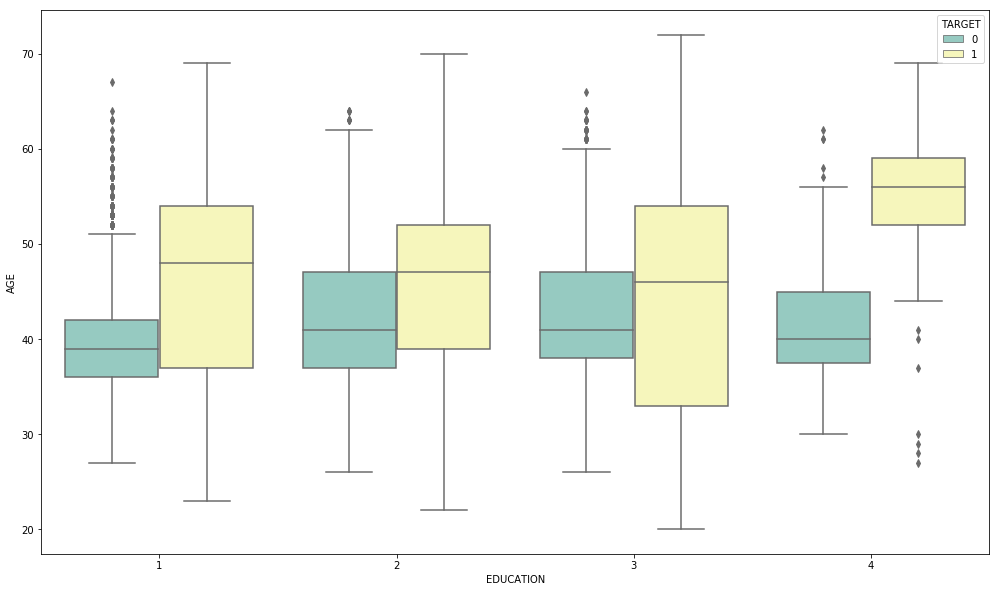

In [114]:
plt.figure(figsize = (17, 10))
sns.boxplot(x="EDUCATION", y="AGE", hue="TARGET", data=dftrain, palette="Set3")

Berdasarkan hasil explorasi data **TARGET** dengan keterangan 0: Tidak Terlambat dan 1: Terlambat <br>
Diketahui bahwa label SEX **2: Wanita** yang paling banyak **terlambat** melakukan pembayaran kartu kredit dengan rentang usia sekitar **35-55 tahun**

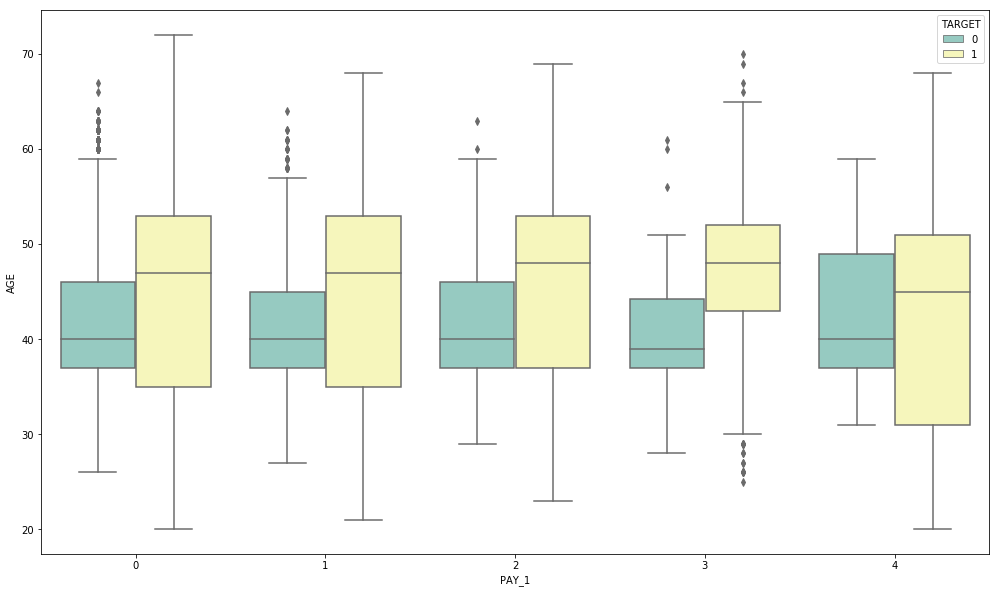

In [115]:
plt.figure(figsize = (17, 10))
sns.boxplot(x="PAY_1", y="AGE", hue="TARGET", data=dftrain, palette="Set3")

Berdasarkan hasil explorasi data **TARGET** dengan keterangan 0: Tidak Terlambat dan 1: Terlambat <br>
Diketahui bahwa pada **pembayaran kredit pertama**, pelanggan paling banyak terlambat melakukan pembayaran sekitar 4 bulan yaitu pelanggan yang memiliki rentang usia sekitar **30-55 tahun**

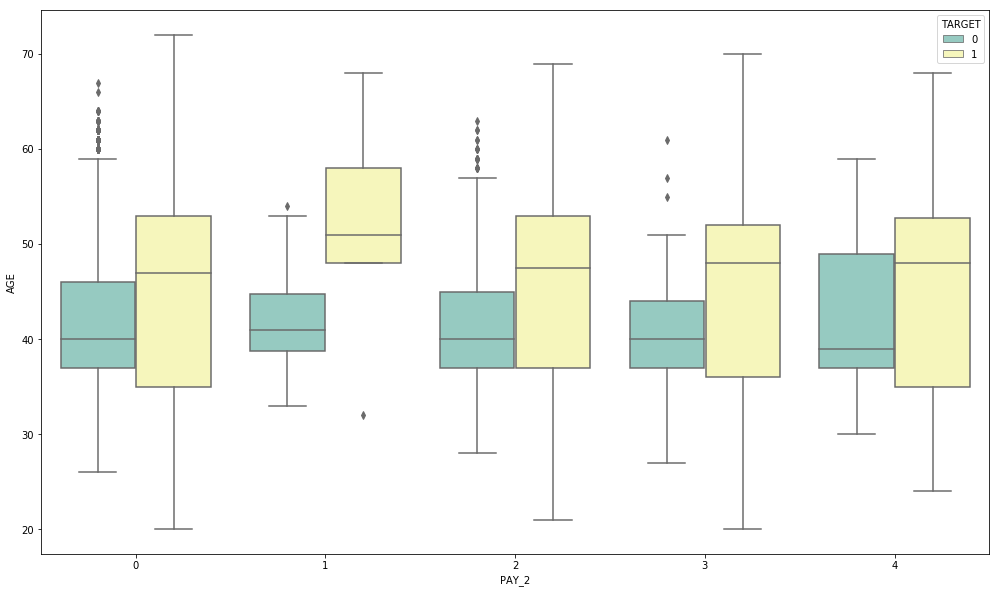

In [116]:
plt.figure(figsize = (17, 10))
sns.boxplot(x="PAY_2", y="AGE", hue="TARGET", data=dftrain, palette="Set3")

Berdasarkan hasil explorasi data **TARGET** dengan keterangan 0: Tidak Terlambat dan 1: Terlambat <br>
Diketahui bahwa pada **pembayaran kredit kedua**, pelanggan paling banyak terlambat melakukan pembayaran sekitar 4 bulan yaitu pelanggan yang memiliki rentang usia sekitar **30-55 tahun**

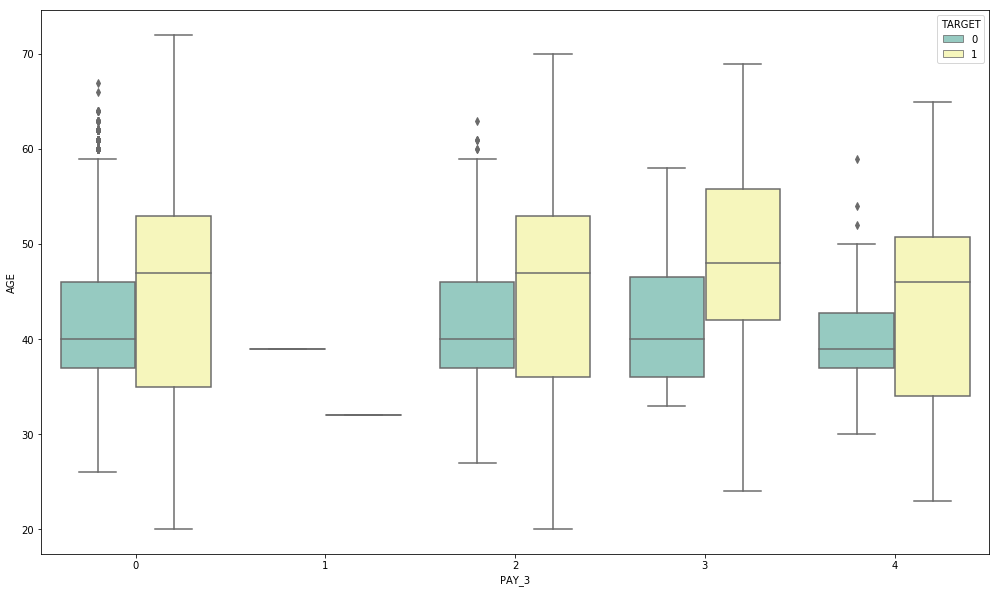

In [117]:
plt.figure(figsize = (17, 10))
sns.boxplot(x="PAY_3", y="AGE", hue="TARGET", data=dftrain, palette="Set3")

Berdasarkan hasil explorasi data **TARGET** dengan keterangan 0: Tidak Terlambat dan 1: Terlambat <br>
Diketahui bahwa pada **pembayaran kredit ketiga**, pelanggan paling banyak terlambat melakukan pembayaran sekitar 1 bulan yaitu pelanggan yang memiliki rentang usia sekitar **30-55 tahun** dan tidak terdapat pelanggan yang melakukan pembayaran kredit dalam waktu 1 bulan.

## MODELLING
Modelling ini dilakukan untuk melakukan penilaian untuk pembayaran kredit pada bulan selanjutnya, apakah terlambat atau tidak terlambat

### 1. Train to Split

In [118]:
import numpy as np
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, recall_score, precision_score, roc_auc_score

def plot_rocCurve(aClf, X_test,y_test, modelName):
    roc_auc = roc_auc_score(y_test,aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr,color='purple',label='Under curve values = %0.2f' %roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Plot')
    plt.legend(loc='lower right')
    plt.show()

In [119]:
#definition X and Y
X = dftrain[['EDUCATION','AGE','PAY_1','PAY_2','PAY_3']] #select feature which has highest impact for TARGET
y = dftrain['TARGET']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #test 30% dan train 70%

### 2. Compare Model

### 2.1 Model 1 (RandomForest)

#### Feature Scaling

In [121]:
#Create a Gaussian Classifier
#Tuning
#clf=RandomForestClassifier(random_state=20)
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Accuracy

In [122]:
# Model Accuracy, how often is the classifier correct?
print("Akurasi dari model RandomForest adalah %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Recall dari model RandomForest adalah %.2f" % metrics.recall_score(y_test, y_pred))
print("Precision dari model RandomForest adalah %.2f" % metrics.precision_score(y_test, y_pred))
print("AUC dari model RandomForest adalah %.2f" % metrics.roc_auc_score(y_test, y_pred))

Akurasi dari model RandomForest adalah 0.78
Recall dari model RandomForest adalah 0.61
Precision dari model RandomForest adalah 0.78
AUC dari model RandomForest adalah 0.75


AUC menyediakan ukuran kinerja keseluruhan di semua ambang klasifikasi yang memungkinkan. <br>
Nilai **AUC (Area Under the ROC Curve)** termasuk tinggi yaitu sebesar **0.75** 

In [123]:
#make matrix true positive, true negative, false positive, false negative
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2654,  338],
       [ 783, 1213]], dtype=int64)

True Positive = 2672 <br>
False Positive = 745 <br>
True Negative = 332 <br>
False Negative = 1239 <br>

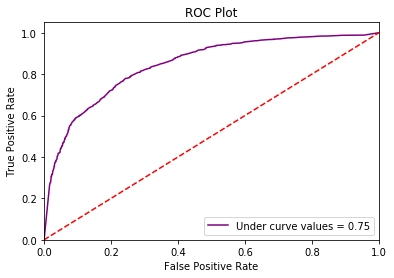

In [124]:
plot_rocCurve(clf, X_test, y_test, modelName='Random Forest')

### 2.2 Model 2 Support Vector Machines (SVM)

In [125]:
#Import svm model
from sklearn import svm

#### Splitting Data

In [126]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) #test 30% dan train 70%

#### Generating Model

In [131]:
#Create a svm Classifier
#clf = svm.SVC(kernel='linear', C=100) # Linear Kernel, number of pinalty error
clf = svm.SVC(kernel='linear',probability=True)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

#### Evaluating the Model

In [133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Akurasi dari model SVM adalah %.2f" % metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision dari model SVM adalah %.2f" % metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall dari model SVM adalah %.2f" % metrics.recall_score(y_test, y_pred))

# Model ACU: what percentage of positive tuples are labelled as such?
print("AUC dari model SVM adalah %.2f" % metrics.roc_auc_score(y_test, y_pred))

Akurasi dari model SVM adalah 0.53
Precision dari model SVM adalah 0.38
Recall dari model SVM adalah 0.30
AUC dari model SVM adalah 0.49


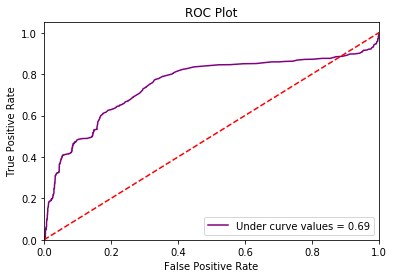

In [134]:
plot_rocCurve(clf, X_test, y_test, modelName='Support Vector Machines')

### 2.3 Decision Tree

#### Split Data

In [135]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Building Model

In [136]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
#Tuning
#clf = DecisionTreeClassifier(max_depth=3)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)
y_pred2

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Evaluating Model

In [137]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Akurasi dari model Decision Tree adalah %.2f" % metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision dari model Decision Tree adalah %.2f" % metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall dari model Decision Tree adalah %.2f" % metrics.recall_score(y_test, y_pred))

# Model ACU: what percentage of positive tuples are labelled as such?
print("AUC dari model Decision Tree adalah %.2f" % metrics.roc_auc_score(y_test, y_pred))

Akurasi dari model Decision Tree adalah 0.55
Precision dari model Decision Tree adalah 0.42
Recall dari model Decision Tree adalah 0.32
AUC dari model Decision Tree adalah 0.51


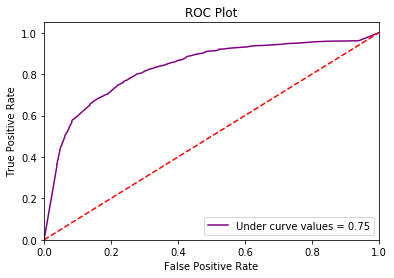

In [138]:
plot_rocCurve2(clf, X_test, y_test, modelName='Decision Tree')

### 3. Select Model

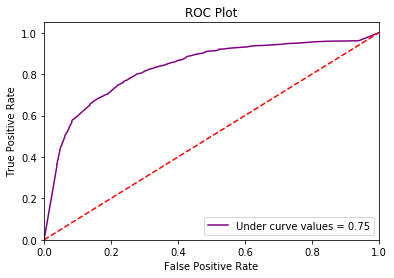

In [139]:
plot_rocCurve(clf, X_test, y_test, modelName='Random Forest')

Dari hasil model diatas menunjukkan bahwa nilai bawah kurva sebesar **0.76**, sehingga model tersebut dapat digolongkan sebagai **model yang baik untuk memprediksi credit scoring** selanjutnya. Dikarenakan mendekati 0.90

# TESTING

In [140]:
#Create a Gaussian Classifier
#Tuning
#clf=RandomForestClassifier(random_state=20)
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

XTEST = dftest[['EDUCATION','AGE','PAY_1','PAY_2','PAY_3']]

y_pred=clf.predict(XTEST)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [141]:
dftest['TARGET'] = pd.Series(y_pred)
dftest

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,1
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16620,350000.0,1,2,1,56,2,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,380000.0,2,2,1,60,2,2,2,77708.0,79384.0,77519.0,3500.0,0.0,7000.0,1
16622,340000.0,2,2,1,56,3,2,0,3356.0,2758.0,20878.0,0.0,22000.0,4200.0,1
16623,430000.0,1,1,1,61,0,0,0,78379.0,76304.0,52774.0,3409.0,1178.0,1926.0,1


In [142]:
dftest.shape

(16625, 15)

In [143]:
dftest.to_csv('Hasil Testing Astra Credit Scoring.csv')